In [136]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Calculation

#### power method

method to get dominant eigenvector

In [137]:
#source: https://en.wikipedia.org/wiki/Power_iteration
def power_iteration(A, num_simulations):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = A@ b_k

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

In [138]:
A=np.array([[0.5, 0.5], [0.2, 0.8]])
A

array([[ 0.5,  0.5],
       [ 0.2,  0.8]])

In [139]:
power_iteration(A, 10)

array([ 0.70710528,  0.70710828])

numpy method to get eigenvector

In [140]:
#compare with numpu result
eigvals, eigvecs=np.linalg.eig(A)

In [141]:
eigvals

array([ 0.3,  1. ])

In [142]:
eigvecs

array([[-0.92847669, -0.70710678],
       [ 0.37139068, -0.70710678]])

In [143]:
#we can get original matrix from eigenvectors and -values
eigvecs @np.diag(eigvals)@ np.linalg.inv(eigvecs)

array([[ 0.5,  0.5],
       [ 0.2,  0.8]])

confirm first vector is eigenvector

In [144]:
# confirm first eigenvector
B = A @ (eigvecs[:, 0])
print(B)
C = eigvecs[:, 0] * eigvals[0]
print(C)

[-0.27854301  0.1114172 ]
[-0.27854301  0.1114172 ]


## Visual meaning

idea: http://setosa.io/ev/eigenvectors-and-eigenvalues/

we have vector v (a point). we also have matrix transformation matrix A with columns a1 and a2. Av is just v multiplied by A. let's plot them

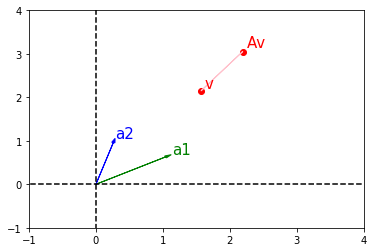

In [145]:
v=np.array([1.57,2.15])
A=np.array([[1.04, 0.26],
          [0.63, 0.96]])
Av=A@v

fig, ax = plt.subplots()
ax.set_xlim([-1,4])
ax.set_ylim([-1,4])
ax.hlines(0,-10, 10, linestyle='--')
ax.vlines(0,-10, 10, linestyle='--')

ax.scatter(*v, color='red')
ax.text(*(v*1.03), 'v', fontsize=15, color='red')

ax.scatter(*Av, color='red')
ax.text(*(Av*1.03), 'Av', fontsize=15, color='red')
ax.arrow(*v, *(Av-v),color='pink')

ax.arrow(0, 0, *A[:,0], head_width=0.05, head_length=0.1, color='green')
ax.text(*(A[:,0]*1.1), 'a1', fontsize=15, color='green')
ax.arrow(0, 0, *A[:,1], head_width=0.05, head_length=0.1, color='blue')
ax.text(*(A[:,1]*1.1), 'a2', fontsize=15, color='blue')

If you can draw a line through the three points (0,0), v and Av, then Av is just v multiplied by a number λ; that is, Av=λv. In this case, we call λ an eigenvalue and v an eigenvector. Let's calculate eigenvectors and eigenvalues and see them on the plot

In [146]:
eigvals, eigvecs=np.linalg.eig(A)
eigvals

array([ 1.40669399,  0.59330601])

In [147]:
eigvecs

array([[ 0.5784001 , -0.5030458 ],
       [ 0.81575323,  0.86425975]])

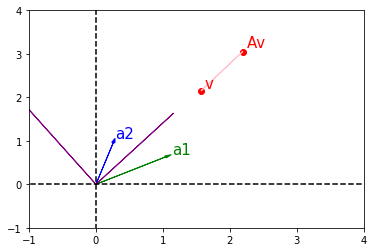

In [148]:
ax.arrow(0,0, *eigvecs[:,0]*2, color='purple')
ax.arrow(0,0, *eigvecs[:,1]*2, color='purple')
fig

we can see, that one of the eigenvectors is going to match vector v Av. Eigenvectors are perpendicular. In essence, an eigenvector of a linear transformation A is a non-zero vector that, when A is applied to it, does not change direction. Applying A to the eigenvector only scales the eigenvector by the scalar value λ, called an eigenvalue.

## Version 2

transformation matrix A and matrix that we'll be transforming x.

In [149]:
A = np.matrix([[1, 0.3], [0.45, 1.2]])

In [150]:
x=np.array([[-10,-10, 20,20],
           [-10, 20, 20, -10]])

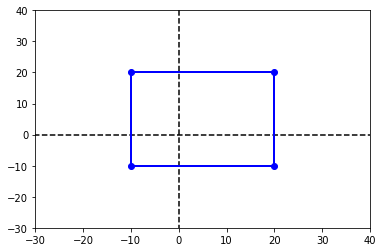

In [151]:
fig, ax = plt.subplots()
ax.set_xlim([-30,40])
ax.set_ylim([-30,40])
ax.hlines(0,-100, 100, linestyle='--')
ax.vlines(0,-100, 100, linestyle='--')

x_points, y_points = x
size=len(x[0])
for i in range(size):
    ax.plot(x_points[i], y_points[i], color='blue', marker='o')
    ax.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             color='blue', linestyle='-', linewidth=2)

apply transformation

In [152]:
Ax=A@x

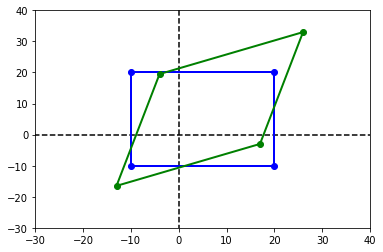

In [153]:
x_points, y_points = Ax
x_points=np.array(x_points)[0]
y_points=np.array(y_points)[0]

# size=len(x[0])
for i in range(size):
    ax.plot(x_points[i], y_points[i], color='green', marker='o')
    ax.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             color='green', linestyle='-', linewidth=2)
fig

calculate eigenvalues and -vectors

In [159]:
evals, evecs = np.linalg.eig(A)
evals

array([ 0.71921134,  1.48078866])

In [160]:
evecs

matrix([[-0.73009717, -0.52937334],
        [ 0.68334334, -0.84838898]])

calculate gradient to plot eigenvectors

In [155]:
x_v1, y_v1 = evecs[:,0].getA1()
x_v2, y_v2 = evecs[:,1].getA1()

In [156]:
m1 = y_v1/x_v1 # Gradient of 1st eigenvector
m2 = y_v2/x_v2 # Gradient of 2nd eigenvector
m1, m2

(-0.93596218431065159, 1.6026288509773183)

plot them

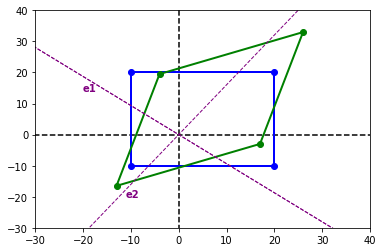

In [158]:
ax.plot([x_v1*-50, x_v1*50], [y_v1*-50, y_v1*50],linestyle='--', linewidth=1, color='purple')
ax.plot([x_v2*-50, x_v2*50], [y_v2*-50, y_v2*50],linestyle='--',linewidth=1, color='purple')
ax.annotate('e1', xy=(-20, 14),textcoords='data', weight='semibold', color='purple')
ax.annotate('e2', xy=(-11, -20),textcoords='data', weight='semibold', color='purple')
fig

eigenvalue 1 is smaller than 1 which means transformation reduces length in e1 side, it is other way around with eigenvalue 2 and e2